# Este será 1 primeiro de muitos tutoriais sobre machine learning. Iremos começar com uma das técnicas mais básicas de todas, a Regressão Polinomial.

Basicamente, o problema de regressão é o seguinte: Eu tenho um conjunto de dados, e quero definir qual função, de uma família específica de funções, é a que melhor descreve o meu problema.

Neste caso, escolhemos a função, dentre as funções da família, que minimiza a soma do quadrado das distâncias, onde a distância, no geral, é tomada como a distância euclideana, ou seja, a distância entre ponto a e b é o "tamanho" do segmento de reta que une a e b.

Para este problema, iremos adotar a família de funções da forma:

$$ f(x) = a_nx^n + a_{n-1}x^{n-1} + ... +a_0x^0 , n = 0, 1, 2, ... $$

Matemáticamente, queremos minimizar o seguinte problema:


$$Min: g(x) = (f(x1) - x1)^2 + (f(x2) - x2)^2 + ... (f(xn) - xn)^2$$

Além disso, podemos querer comparar a melhor função de cada família de funções para saber qual função de fato escolher. Tudo isso ficará mais claro ao decorrer do código.


Em termos de implementação, podemos utilizar a biblioteca sklearn e a biblioteca numpy



Por exemplo, vamos ver a relação entre horas estudadas e nota das provas de uma pequena turma de uma escola






In [31]:

#para fazermos plots
import matplotlib.pyplot as plt

#estamos desligando os warnings, pois iremos recebe-los quando ocorrer o overfitting
import warnings
warnings.filterwarnings("ignore")


#biblioteca para fazer sorteios dentro de uma distribuiçao
from random import randint, normalvariate





#numero de alunos de uma determinada disciplina
numero_alunos = 40

#lista que ira conter esses alunos
lista_alunos = []




#classe aluno

#cada aluno ira ser identificado por um numero (id), além de ter as horas estudadas e a sua nota
class aluno():
    
    
   def  __init__(self, numero, horas_estudadas, nota):
       
       
       self.numero = numero
       self.horas_estudadas = horas_estudadas
       self.nota = nota
       
       
       
   #metodo que coloca uma quantidade de horas estudadas, sendo 5 a media e 2 o desvio padrao, com distribuicao normal
    
   def m_coloca_horas(self):
        
       self.horas_estudadas = round(normalvariate(5, 2), 1)
    
    
       if self.horas_estudadas < 0:

         self.horas_estudadas = 0
    
    
   #metodo que coloca uma nota aleatorio dentro de um intervalo, sendo funcao do numero de horas de estudo e seguindo uma distribuicao normal 
   def m_coloca_nota(self):
       
       self.nota =  round(normalvariate(self.horas_estudadas, 1), 1)
       
       if self.nota > 10:
           
           self.nota = 10
           
           
       if self.nota < 0:
           
           self.nota = 0
       
       
        
   #metodo que nos auxilia a criar um dataframe mais tarde

   #creditos ao autor do seguinte link: https://stackoverflow.com/questions/34997174/how-to-convert-list-of-model-objects-to-pandas-dataframe     
   def m_para_df(self):
       
       
        return {
                
            'numero': self.numero,
            'horas estudadas': self.horas_estudadas,
            'nota':self.nota
        }
   
    



#criando uma lista com n alunos, colocando um numero único para cada um  chamando os métodos   
for i in range(0, numero_alunos):
    
    
    lista_alunos.append(aluno(i+1,0,0))
    
    lista_alunos[-1].m_coloca_horas()
    
    lista_alunos[-1].m_coloca_nota()
    
    
    
    
    


Podemos então observar, por exemplo, o que um dos objetos alunos possuem


In [32]:
print("id do aluno: {}, numero de horas estudadas = {}, nota = {}".format(lista_alunos[-1].numero, lista_alunos[-1].horas_estudadas, lista_alunos[-1].nota))


id do aluno: 40, numero de horas estudadas = 4.6, nota = 4.6


Agora, podemos fazer um plot das horas estudadas e das notas para termos uma noção de como eles se comportaram.

Mas antes disso, seria muito mais fácil colocar as informações dos alunos em um dataframe, pois assim poderíamos ter uma noção mais ampla do que esta acontecendo, além de ter mais facilidades ao fazer o plot.

In [33]:
#agora, iremos passar a nossa lista para um dataframe, pois eh mais facil de visualizarmos os dados

#importando a biblioteca pandas, que é a biblioteca utilzada para dataframes
import pandas as pd

#criando um dataframe para os alunos
df_alunos = pd.DataFrame.from_records([aluno.m_para_df() for aluno in lista_alunos])


#verificando as informações do dataframe

# mostrando a informacao sobre os 5 primeiros alunos

print(df_alunos.head())

#mostrando a informação sobre os 5 últimos alunos
print(df_alunos.tail())

   horas estudadas  nota  numero
0              3.7   4.4       1
1              6.0   7.0       2
2              3.1   4.1       3
3              6.9   5.9       4
4              8.1   9.3       5
    horas estudadas  nota  numero
35              4.3   4.6      36
36              5.0   5.4      37
37              6.4   6.6      38
38              7.7   6.5      39
39              4.6   4.6      40


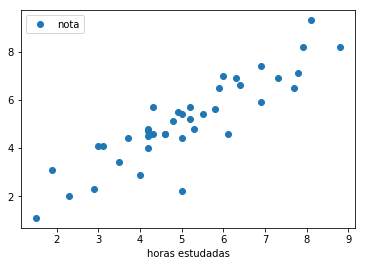

In [34]:
#plotando agora o grafico horas estudadas vs nota

df_alunos.plot(x='horas estudadas', y='nota', style='o')

Podemos ver que, no geral, uma reta descreve bem a relação entre horas estudadas e notas dos alunos para a dada matéria.

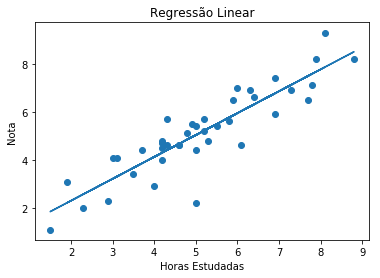

In [35]:

from sklearn.linear_model import LinearRegression



#primeiro, temos que criar um objeto da classe LinearRegression


modelo = LinearRegression()

#nao passando nenhum parametro, usaremos todos eles como default



'''

Precisamos, primeiro, transformar a nossa coluna de dataframe para um array, por isso usamos .values
Após isso, precisamos dar reshape(-1,1) para podermos colocar no formato que a biblioteca pede.
Caso não esteja nesse formato, aparecerá um Warning avisando qual reshape deve ser utilizado

'''
modelo.fit((df_alunos['horas estudadas'].values).reshape(-1,1), df_alunos['nota'].values)



plt.scatter((df_alunos['horas estudadas'].values).reshape(-1,1), df_alunos['nota'].values)
plt.plot((df_alunos['horas estudadas'].values).reshape(-1,1), modelo.predict((df_alunos['horas estudadas'].values).reshape(-1,1)))
plt.title('Regressão Linear')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


Agora, iremos aplicar a regressão ainda como critério o método dos mínimos quadrados para polinômios de outros graus. Como iremos ver a seguir, ocorrerá para os polinômios de graus mais elavados o conceito de Overfitting.

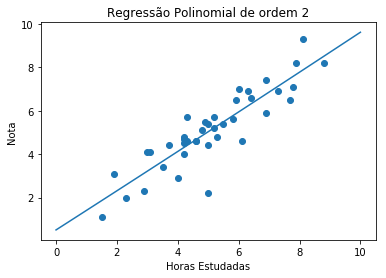

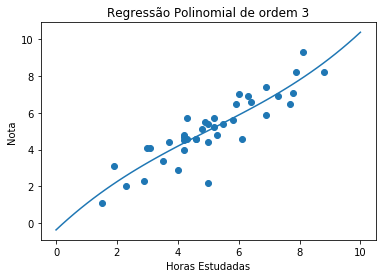

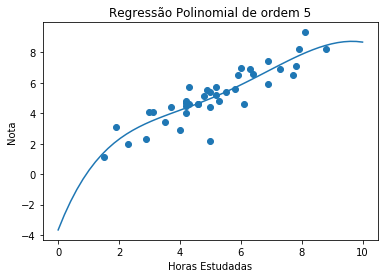

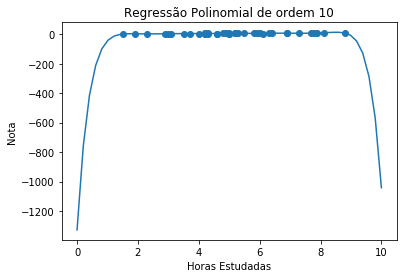

In [36]:

# agora, iremos tentar fazer uma regressao utilizando polinomios de outras ordemns, para explicarmos o conceito de overfitting
# de uma maneira mais intuitiva

'''
para isso, utilizaremos a biblioteca numpy, que possui a função polyfit, que retorna os valores dos parâmteros do polinômio,
utilizando o critério dos mínimos quadrados

'''
import numpy as np



x = df_alunos['horas estudadas'].values
    
y =  df_alunos['nota'].values


#parabola

#xp é o domínio da nossa função, que está variando de 0 à 10, que são as notas dos alunos
xp = np.linspace(0, 10)

#p1 é o polinômio de grau n
p1 = np.poly1d(np.polyfit(x,y,2))


plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 2')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()

#grau 3
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,3))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 3')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


#grau 5
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,5))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 5')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()



#grau 10
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,10))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem 10')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


Como podemos ver para o polinômio de grau 10, o programa ajustou de maneira muito ruim a nossa função, apesar de ela ser a função que minimiza a soma do quadrado das distâncias entre x e f(x). Inlcusive podemos receber Warnings sobre isso.


Agora, para exemplificarmos perfeitamente o conceito de Overfitting, iremos tentar utilizar um polinômio com grau igual ao número de pontos - 1.

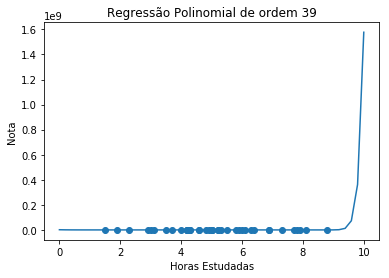

In [37]:
#grau numero_alunos
xp = np.linspace(0, 10)
p1 = np.poly1d(np.polyfit(x,y,numero_alunos - 1))
plt.scatter(x,y)
plt.plot(xp, p1(xp))
plt.title('Regressão Polinomial de ordem ' + str(numero_alunos - 1))
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


Mas agora, como podemos garantir qual família de funções é a mais adequada?

Para isso, podemos refazer o nosso problema, agora separando uma parte da amostra para calibração dos parâmetros (treino) e a outra parte para o cálculo do erro da previsão (teste).

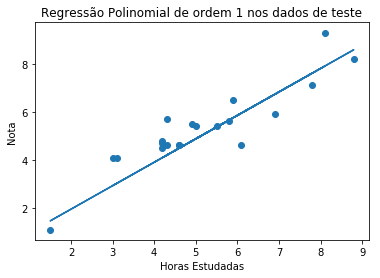

Erro quadrático médio: 0.62
Variância: 0.77


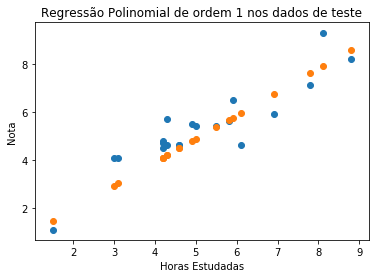

Erro quadrático médio: 0.62
Variância: 0.77


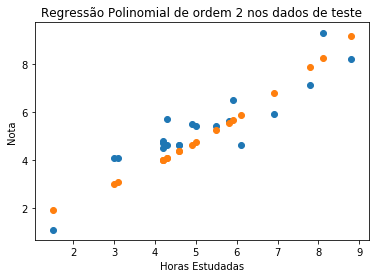

Erro quadrático médio: 0.72
Variância: 0.73


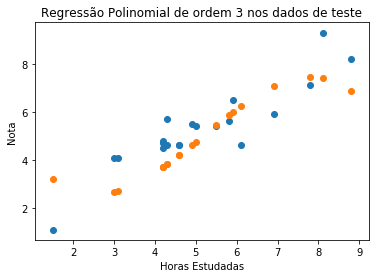

Erro quadrático médio: 1.34
Variância: 0.50


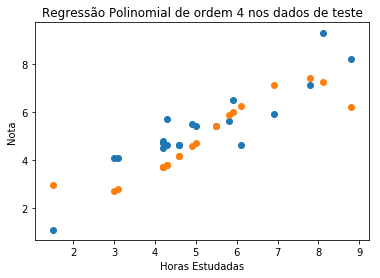

Erro quadrático médio: 1.43
Variância: 0.46


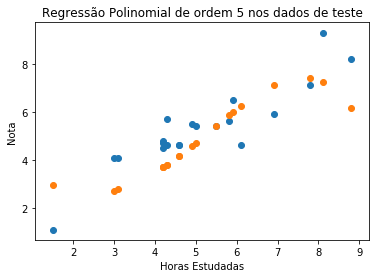

Erro quadrático médio: 1.45
Variância: 0.46


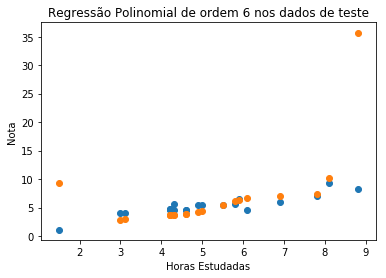

Erro quadrático médio: 42.12
Variância: -14.75


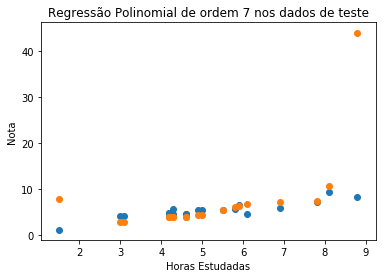

Erro quadrático médio: 67.32
Variância: -24.17


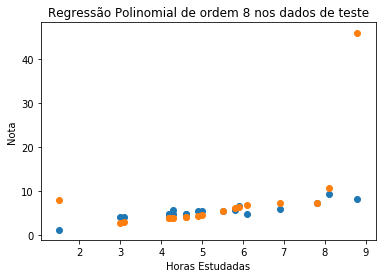

Erro quadrático médio: 74.61
Variância: -26.90


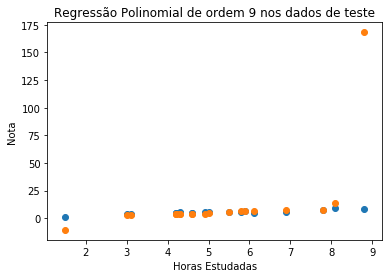

Erro quadrático médio: 1286.92
Variância: -480.22


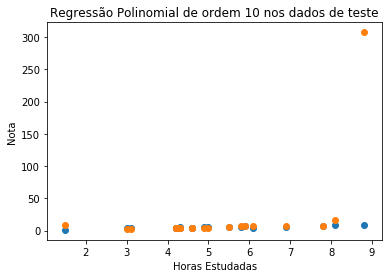

Erro quadrático médio: 4484.63
Variância: -1675.95


In [38]:

from sklearn.model_selection import train_test_split 


#aqui estamos dividindo nossos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)



X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

'''
deixando random_state = 1, a função de dividir em teste e treino sempre vai dividir da mesma forma. Por exemplo, se os
dados fossem os mesmos para 2 usuários, então colocando o mesmo "seed", eles teriam sempre os dados divididos da mesma maneira

caso random_state fosse igual a zero, então não haveríamos o seed para sempre termos um mesmo split
'''

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


#caso linear

linear = linear_model.LinearRegression()

#treinando o modelo
linear.fit(X_train, y_train)

#fazendo previsões em cima dos testes
y_pred = linear.predict(X_test)



# gráfico
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.title('Regressão Polinomial de ordem 1 nos dados de teste')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota')
plt.show()


# erro quadrático médio
print("Erro quadrático médio: %.2f"
      % mean_squared_error(y_test, y_pred))
# Variância
print('Variância: %.2f' % r2_score(y_test, y_pred))



#Agora, se eu nao quero usar um polinomio de grau 1

#Colocando para testar para os polinomios de graus 1 até 10


from sklearn.preprocessing import PolynomialFeatures

for i in range(1, 11):

    grau_polinomio = i
    
    
    #objeto do tipo polinomio
    polinomio_n = PolynomialFeatures(degree=grau_polinomio)
    
    
    #utilizamos essa transformação para poder usarmos o linear_model
    X_train_transform = polinomio_n.fit_transform(X_train)
    
    X_test_transform = polinomio_n.fit_transform(X_test)
    
    
    #fazemos a mesma coisa que fizemos para a regressão linear
    
    linear = linear_model.LinearRegression()
    
    
    # fit this to Linear Regressor
    linear.fit(X_train_transform,y_train) 
    
    # get the predictions
    y_pred = linear.predict(X_test_transform)
    
    
    
    

    
    # grafico
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, y_pred)
    plt.title('Regressão Polinomial de ordem ' + str(grau_polinomio) + ' nos dados de teste')
    plt.xlabel('Horas Estudadas')
    plt.ylabel('Nota')
    plt.show()
    
    # erro quadrático médio
    print("Erro quadrático médio: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Variância
    print('Variância: %.2f' % r2_score(y_test, y_pred))


Quanto menor o erro quadrático médio, e quanto miais próximo de 1 for a variância, melhor é o nosso modelo.

Para este problema das notas, podemos ver que os modelos de ordem mais baixa são os melhores